In [119]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_ta as ta
import vectorbt as vbt
from tvDatafeed import TvDatafeed, Interval
import config_api
import mplfinance as mpf

In [120]:
user = config_api.tradingview_user
password = config_api.tradingview_password

In [121]:
tv = TvDatafeed(user, password, chromedriver_path= None)

In [122]:
ada_1d = tv.get_hist(symbol= 'ADAUSDT', exchange= 'BINANCE', interval= Interval.in_daily, n_bars= 5000)

In [123]:
btc_1d = tv.get_hist(symbol= 'BTCUSDT', exchange= 'BINANCE', interval= Interval.in_daily, n_bars= 5000)

In [124]:
df = btc_1d.copy()

In [125]:
df['rsi'] = df.ta.rsi(length= 14)
df.ta.ma_obv(fast= 20, slow= 40, ma_type= 'ema', append= True)

,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff
datetime,,,,
2017-08-17 07:00:00,7.951504e+02,NaN,NaN,NaN
2017-08-18 07:00:00,-4.047379e+02,NaN,NaN,NaN
2017-08-19 07:00:00,-2.342812e+01,NaN,NaN,NaN
2017-08-20 07:00:00,-4.905111e+02,NaN,NaN,NaN
2017-08-21 07:00:00,-1.182254e+03,NaN,NaN,NaN
...,...,...,...,...
2022-01-24 07:00:00,3.168317e+06,3.235420e+06,3.324708e+06,-89287.607391
2022-01-25 07:00:00,3.217542e+06,3.233717e+06,3.319480e+06,-85762.678718
2022-01-26 07:00:00,3.147712e+06,3.225526e+06,3.311101e+06,-85574.738593


In [126]:
df.columns

Index(['symbol', 'open', 'high', 'low', 'close', 'volume', 'rsi', 'OBV',
       'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff'],
      dtype='object')

In [127]:
ticker = 'BTC'

In [128]:
# 2018 กราฟลงอย่างเดียว
# 2019 ขึ้น และลงปิดปีลบ # มีsideway, uptrend, downtrend
# 2020 ขึ้น ย่อ ขึ้น
# 2021:2022 มีขึ้นหนัก ลงหนัก

C:\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


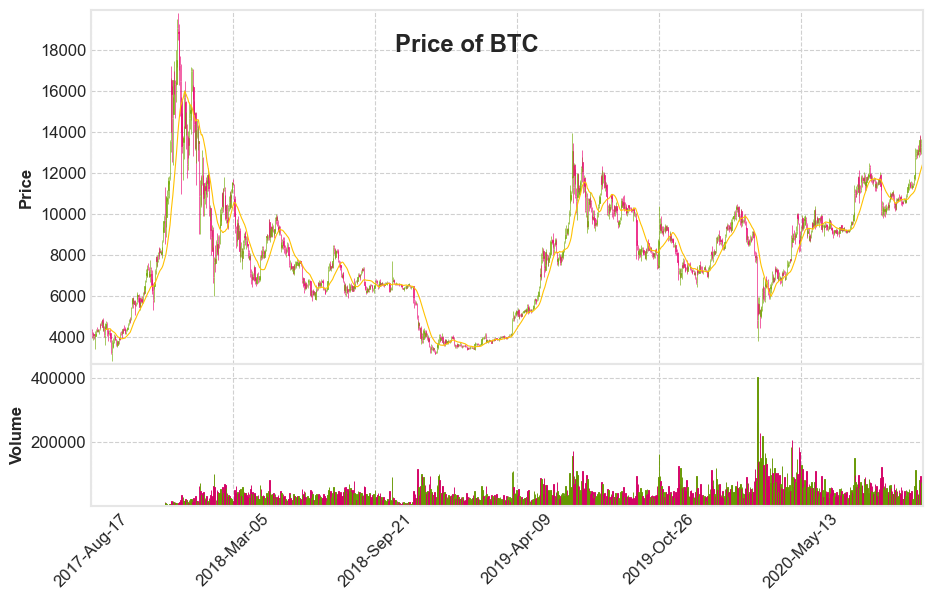

In [108]:
mpf.plot(df.loc[:'2020-10'], figratio=(10, 6), type='candle', mav=(21), volume=True, title = f'Price of {ticker}', tight_layout=True, style='binance')

In [129]:
def enc_rsi(rsi):
    if rsi > 50:
        return 1
    elif rsi < 50:
        return 0
    # try 66 and 33 / 30 and 70

In [130]:
def enc_maobv(maobv):
    if maobv > 0:
        return 1
    elif maobv < 0:
        return 0

In [131]:
df['strength'] = df['rsi'].apply(enc_rsi)
df['vol_in'] = df['IBVe_20_40_diff'].apply(enc_maobv)

In [132]:
df['signal'] = (df['vol_in'] == 1) & (df['strength'] == 1)

In [133]:
df.loc[df['signal'] == 0]

,symbol,open,high,low,close,volume,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,signal
datetime,,,,,,,,,,,,,,
2017-08-17 07:00:00,BINANCE:BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,7.951504e+02,NaN,NaN,NaN,NaN,NaN,False
2017-08-18 07:00:00,BINANCE:BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,-4.047379e+02,NaN,NaN,NaN,NaN,NaN,False
2017-08-19 07:00:00,BINANCE:BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,NaN,-2.342812e+01,NaN,NaN,NaN,NaN,NaN,False
2017-08-20 07:00:00,BINANCE:BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,NaN,-4.905111e+02,NaN,NaN,NaN,NaN,NaN,False
2017-08-21 07:00:00,BINANCE:BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,NaN,-1.182254e+03,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24 07:00:00,BINANCE:BTCUSDT,36244.55,37550.00,32917.17,36660.35,91904.753211,28.755648,3.168317e+06,3.235420e+06,3.324708e+06,-89287.607391,0.0,0.0,False
2022-01-25 07:00:00,BINANCE:BTCUSDT,36660.35,37545.14,35701.00,36958.32,49225.222330,30.337932,3.217542e+06,3.233717e+06,3.319480e+06,-85762.678718,0.0,0.0,False
2022-01-26 07:00:00,BINANCE:BTCUSDT,36958.32,38919.98,36234.63,36809.34,69830.160360,29.979425,3.147712e+06,3.225526e+06,3.311101e+06,-85574.738593,0.0,0.0,False


In [134]:
# df['ret'] = df.close.pct_change()

In [135]:
# df['ret'] = df['ret'].shift(-1)

In [136]:
df['action_price'] = df['open'].shift(-1)

In [137]:
df.columns

Index(['symbol', 'open', 'high', 'low', 'close', 'volume', 'rsi', 'OBV',
       'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff', 'strength', 'vol_in', 'signal',
       'action_price'],
      dtype='object')

In [138]:
df_encoded = df[['open', 'close', 'action_price', 'rsi', 'OBV', 'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff', 'strength', 'vol_in', 'signal']]

In [139]:
df_encoded.loc[(df_encoded['vol_in'] == 1) & (df_encoded['strength'] == 1)]
# มีแค่ส่วนน้อย ที่ str 1 แล้ว vol_in 0 (10%)
# str0 vol1 มีประมาน25 เปอ
# บอกให้เขาัท้ง2อัน 60per

,open,close,action_price,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,signal
datetime,,,,,,,,,,,
2017-10-13 07:00:00,5439.99,5649.98,5650.00,79.508712,4.224729e+03,6.975831e+02,6.090272e+02,88.555884,1.0,1.0,True
2017-10-14 07:00:00,5650.00,5869.99,5855.03,81.561303,5.195488e+03,1.125955e+03,8.327570e+02,293.198001,1.0,1.0,True
2017-10-15 07:00:00,5855.03,5709.99,5710.00,75.628235,3.851965e+03,1.385575e+03,9.800355e+02,405.539559,1.0,1.0,True
2017-10-16 07:00:00,5710.00,5760.02,5760.00,76.210965,5.380961e+03,1.766088e+03,1.194715e+03,571.373235,1.0,1.0,True
2017-10-17 07:00:00,5760.00,5595.00,5595.00,70.244928,3.951092e+03,1.974184e+03,1.329172e+03,645.011430,1.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08 07:00:00,63273.58,67525.83,67525.82,67.649268,3.838702e+06,3.815657e+06,3.789836e+06,25821.523604,1.0,1.0,True
2021-11-09 07:00:00,67525.82,66947.66,66947.67,65.746463,3.794041e+06,3.813599e+06,3.790041e+06,23557.683797,1.0,1.0,True
2021-11-10 07:00:00,66947.67,64882.43,64882.42,59.327232,3.728869e+06,3.805529e+06,3.787057e+06,18472.206220,1.0,1.0,True


In [140]:
df_encoded.ta.tsignals(df_encoded['signal'], asbool= True, append= True)

C:\Anaconda3\lib\site-packages\pandas_ta\core.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = result.iloc[:, i]


,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,
2017-08-17 07:00:00,False,0,False,False
2017-08-18 07:00:00,False,0,False,False
2017-08-19 07:00:00,False,0,False,False
2017-08-20 07:00:00,False,0,False,False
2017-08-21 07:00:00,False,0,False,False
...,...,...,...,...
2022-01-24 07:00:00,False,0,False,False
2022-01-25 07:00:00,False,0,False,False
2022-01-26 07:00:00,False,0,False,False


In [141]:
df_signal = df_encoded

In [142]:
# df_signal = df_encoded.loc[df_encoded['TS_Trades'] != 0]

In [143]:
# Be careful,  Calculating ret must happend with only trade != 0 dataframe
# need to get next day open before create Event dataframe

In [144]:
df_signal

,open,close,action_price,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,,,,,,,,,,,,
2017-08-17 07:00:00,4261.48,4285.08,4285.08,NaN,7.951504e+02,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False
2017-08-18 07:00:00,4285.08,4108.37,4108.37,NaN,-4.047379e+02,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False
2017-08-19 07:00:00,4108.37,4139.98,4120.98,NaN,-2.342812e+01,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False
2017-08-20 07:00:00,4120.98,4086.29,4069.13,NaN,-4.905111e+02,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False
2017-08-21 07:00:00,4069.13,4016.00,4016.00,NaN,-1.182254e+03,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24 07:00:00,36244.55,36660.35,36660.35,28.755648,3.168317e+06,3.235420e+06,3.324708e+06,-89287.607391,0.0,0.0,False,False,0,False,False
2022-01-25 07:00:00,36660.35,36958.32,36958.32,30.337932,3.217542e+06,3.233717e+06,3.319480e+06,-85762.678718,0.0,0.0,False,False,0,False,False
2022-01-26 07:00:00,36958.32,36809.34,36807.24,29.979425,3.147712e+06,3.225526e+06,3.311101e+06,-85574.738593,0.0,0.0,False,False,0,False,False


In [145]:
df_signal['ret'] = df_signal['action_price'].pct_change().shift(-1)

# create ret, to check if buy its, dose its profitable
# shift only pct_Change back to where is signal happend, because action_price are already shifted

In [146]:
df_signal['profit'] = df_signal['ret'] > 0

In [147]:
df_signal

,open,close,action_price,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits,ret,profit
datetime,,,,,,,,,,,,,,,,,
2017-08-17 07:00:00,4261.48,4285.08,4285.08,NaN,7.951504e+02,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False,-0.041238,False
2017-08-18 07:00:00,4285.08,4108.37,4108.37,NaN,-4.047379e+02,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False,0.003069,True
2017-08-19 07:00:00,4108.37,4139.98,4120.98,NaN,-2.342812e+01,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False,-0.012582,False
2017-08-20 07:00:00,4120.98,4086.29,4069.13,NaN,-4.905111e+02,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False,-0.013057,False
2017-08-21 07:00:00,4069.13,4016.00,4016.00,NaN,-1.182254e+03,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False,0.005976,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24 07:00:00,36244.55,36660.35,36660.35,28.755648,3.168317e+06,3.235420e+06,3.324708e+06,-89287.607391,0.0,0.0,False,False,0,False,False,0.008128,True
2022-01-25 07:00:00,36660.35,36958.32,36958.32,30.337932,3.217542e+06,3.233717e+06,3.319480e+06,-85762.678718,0.0,0.0,False,False,0,False,False,-0.004088,False
2022-01-26 07:00:00,36958.32,36809.34,36807.24,29.979425,3.147712e+06,3.225526e+06,3.311101e+06,-85574.738593,0.0,0.0,False,False,0,False,False,0.009587,True


In [148]:
# (df_signal['ret']+1).cumprod().plot()
# plt.show()

# trading cumulative return

In [149]:
# (df_signal['ret']).plot()
# plt.show()

# trading return

In [150]:
benchmark = (df_signal['close'].iloc[-1]) / (df_signal['open'].iloc[0])
print(f'benchmark return= {benchmark}')

benchmark return= 8.736633751654356


In [151]:
df_ml = df_signal

In [152]:
df_ml.columns

Index(['open', 'close', 'action_price', 'rsi', 'OBV', 'OBVe_20', 'OBVe_40',
       'IBVe_20_40_diff', 'strength', 'vol_in', 'signal', 'TS_Trends',
       'TS_Trades', 'TS_Entries', 'TS_Exits', 'ret', 'profit'],
      dtype='object')

In [153]:
df_ml = df_ml[['rsi', 'OBV', 'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff', 'strength', 'vol_in', 'signal', 'profit']]

In [154]:
df_ml = df_ml.dropna()

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [156]:
X = df_ml.iloc[:-200, :-1]

In [157]:
y = df_ml.iloc[:-200, -1:]

In [158]:
X

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,signal
datetime,,,,,,,,
2017-09-25 07:00:00,48.796721,-9.425229e+02,7.357566e+00,7.100303e+02,-702.672752,0.0,0.0,False
2017-09-26 07:00:00,47.987092,-1.469251e+03,-1.332718e+02,6.037239e+02,-736.995729,0.0,0.0,False
2017-09-27 07:00:00,54.556052,-8.410799e+02,-2.006821e+02,5.332457e+02,-733.927790,1.0,0.0,False
2017-09-28 07:00:00,54.117714,-1.690865e+03,-3.426043e+02,4.247525e+02,-767.356779,1.0,0.0,False
2017-09-29 07:00:00,54.121790,-8.855570e+01,-3.184092e+02,3.997130e+02,-718.122250,1.0,0.0,False
...,...,...,...,...,...,...,...,...
2021-07-08 07:00:00,42.737684,3.208639e+06,3.244277e+06,3.311667e+06,-67389.902815,0.0,0.0,False
2021-07-09 07:00:00,46.070459,3.255793e+06,3.245374e+06,3.308941e+06,-63567.584376,0.0,0.0,False
2021-07-10 07:00:00,45.128866,3.221032e+06,3.243055e+06,3.304653e+06,-61597.594501,0.0,0.0,False


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 10)

In [160]:
rf = RandomForestClassifier(n_estimators= 100, max_depth= 3, random_state= 14)

In [161]:
rf.fit(X_train, y_train)

<ipython-input-161-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=14)

In [162]:
y_pred = rf.predict(X_test)

In [163]:
confusion_matrix(y_test, y_pred)

array([[ 24, 107],
       [ 25, 122]], dtype=int64)

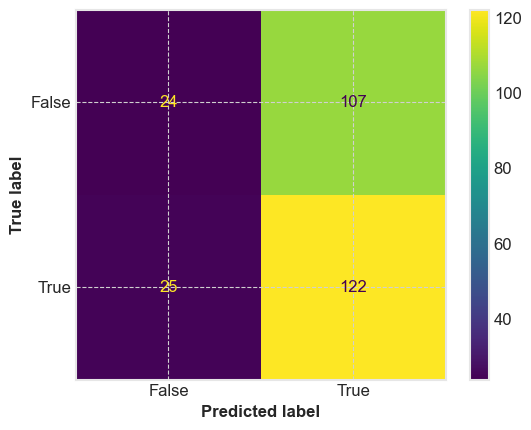

In [164]:
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

In [165]:
compare = pd.DataFrame(y_test)
compare['predict'] = y_pred

In [166]:
compare = compare * 1

In [167]:
compare['check'] = (compare['predict']) = (compare['profit'] )
n_correct = compare['check'].sum()
n_predict = compare['check'].count()

In [168]:
correct_rate = n_correct / n_predict
print(f'prediction correct rate: {correct_rate}')

prediction correct rate: 0.5287769784172662


In [169]:
compare['predict'] + compare['profit']
# ถูก 4 จาก 16 

datetime
2017-10-02 07:00:00    0
2017-10-26 07:00:00    0
2018-07-21 07:00:00    0
2018-02-15 07:00:00    2
2019-07-14 07:00:00    2
                      ..
2020-03-19 07:00:00    2
2017-11-24 07:00:00    2
2019-07-25 07:00:00    0
2018-08-20 07:00:00    2
2018-01-07 07:00:00    0
Length: 278, dtype: int32

# live_test

#### live test without filter by signal, use only ml to create action
#### livetest โดยใช้ ML มากำหนด action เลย โดยที่ไม่ผ่านการฟีลเตอร์ด้วย signal ก่อน

prepare data for live predict and backtest

In [170]:
df_ml.iloc[-200 , :-1]
# แต่จะใช้วิธีล็อควันเริ่มจะวันสุดท้ายที่ล็อคdata ไป train test ล็อคเข้ากับ dataframe เต็ม แล้วมา predict เอา signal
# get to know the last date when to start live test
#df_ml.iloc[80: ,-1:]

rsi                     43.076937
OBV                3163296.540115
OBVe_20            3232874.819285
OBVe_40            3290809.409763
IBVe_20_40_diff     -57934.590478
strength                      0.0
vol_in                        0.0
signal                      False
Name: 2021-07-13 07:00:00, dtype: object

In [171]:
# loc from last date
df3 = df_encoded.loc['2021-07-13':]

In [172]:
df3.columns

Index(['open', 'close', 'action_price', 'rsi', 'OBV', 'OBVe_20', 'OBVe_40',
       'IBVe_20_40_diff', 'strength', 'vol_in', 'signal', 'TS_Trends',
       'TS_Trades', 'TS_Entries', 'TS_Exits', 'ret', 'profit'],
      dtype='object')

In [173]:
df3 = df3[['close', 'action_price', 'rsi', 'OBV', 'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff', 'strength', 'vol_in', 'signal']]
# get only needed columns

In [174]:
# calculate return to be a y_live_test
df3['ret'] = df3['action_price'].pct_change().shift(-1)

df3['profit'] = df3['ret'] > 0

In [175]:
df3.columns

Index(['close', 'action_price', 'rsi', 'OBV', 'OBVe_20', 'OBVe_40',
       'IBVe_20_40_diff', 'strength', 'vol_in', 'signal', 'ret', 'profit'],
      dtype='object')

create new dataframe with only nesscesary column

In [176]:
df_xy = df3[['close', 'rsi', 'OBV', 'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff', 'strength', 'vol_in', 'signal', 'profit']]

In [177]:
#set X and y test

X_live_test = df_xy.iloc[:, 1:-1] # without close
y_live_test = df_xy.iloc[:, -1:]

In [180]:
X_live_test.loc[X_live_test['signal'] == 1]

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,signal
datetime,,,,,,,,
2021-07-28 07:00:00,70.402549,3.688578e+06,3.313909e+06,3.296628e+06,17281.348305,1.0,1.0,True
2021-07-29 07:00:00,70.386529,3.634580e+06,3.344449e+06,3.313113e+06,31335.952853,1.0,1.0,True
2021-07-30 07:00:00,74.780573,3.708183e+06,3.379091e+06,3.332385e+06,46705.557442,1.0,1.0,True
2021-07-31 07:00:00,70.927223,3.663333e+06,3.406161e+06,3.348529e+06,57632.460032,1.0,1.0,True
2021-08-01 07:00:00,63.301102,3.609380e+06,3.425515e+06,3.361253e+06,64262.166799,1.0,1.0,True
...,...,...,...,...,...,...,...,...
2021-11-08 07:00:00,67.649268,3.838702e+06,3.815657e+06,3.789836e+06,25821.523604,1.0,1.0,True
2021-11-09 07:00:00,65.746463,3.794041e+06,3.813599e+06,3.790041e+06,23557.683797,1.0,1.0,True
2021-11-10 07:00:00,59.327232,3.728869e+06,3.805529e+06,3.787057e+06,18472.206220,1.0,1.0,True


In [181]:
y_live_pred = rf.predict(X_live_test)

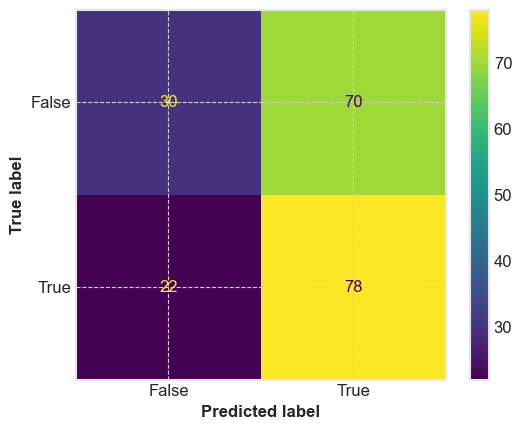

In [94]:
plot_confusion_matrix(rf, X_live_test, y_live_test)
plt.show()

In [96]:
# predict true but its too much actual false, maybe from the training data have too much uptrend

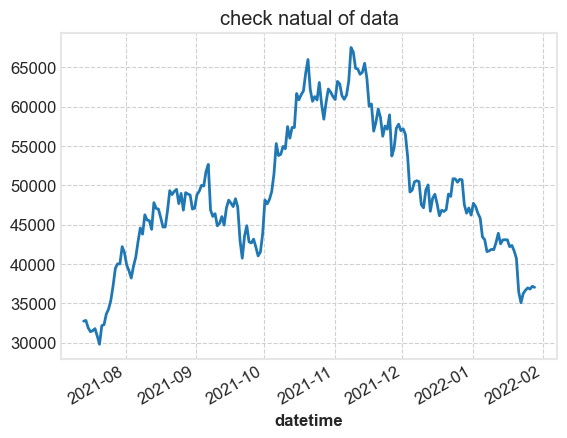

In [105]:
df_xy['close'].plot(title= 'check natual of data')
plt.show()
#### try to add action to this graph

prepare data for vectorbt ค่าy ที่predict ได้มาเป็น signal เริ่มตั้งแต่วันแรกของtest data (live) เพื่อมาลองเทส

In [182]:
df_backtest_live = X_live_test # get all base backtest data from X
df_backtest_live['close'] = df_xy['close'] # get price data from df_xy that have price
df_backtest_live['predict'] = y_live_pred # get signal from y_pred

#df_backtest_live['ret'] = df['close'].pct_change().shift(-1)
#df_backtest_live['profit'] = df_backtest_live['ret'] > 0

In [199]:
df_backtest_live

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,signal,close,predict,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,,,,,,,,,,,
2021-07-13 07:00:00,43.076937,3.163297e+06,3.232875e+06,3.290809e+06,-57934.590478,0.0,0.0,False,32729.77,True,True,0,False,False
2021-07-14 07:00:00,43.459703,3.210074e+06,3.230703e+06,3.286871e+06,-56167.767513,0.0,0.0,False,32820.02,True,True,0,False,False
2021-07-15 07:00:00,40.411624,3.158435e+06,3.223821e+06,3.280606e+06,-56785.300808,0.0,0.0,False,31880.00,True,True,0,False,False
2021-07-16 07:00:00,38.862408,3.109935e+06,3.212974e+06,3.272281e+06,-59306.143474,0.0,0.0,False,31383.87,True,True,0,False,False
2021-07-17 07:00:00,39.547558,3.143947e+06,3.206400e+06,3.266020e+06,-59619.999636,0.0,0.0,False,31520.07,True,True,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24 07:00:00,28.755648,3.168317e+06,3.235420e+06,3.324708e+06,-89287.607391,0.0,0.0,False,36660.35,True,True,0,False,False
2022-01-25 07:00:00,30.337932,3.217542e+06,3.233717e+06,3.319480e+06,-85762.678718,0.0,0.0,False,36958.32,True,True,0,False,False
2022-01-26 07:00:00,29.979425,3.147712e+06,3.225526e+06,3.311101e+06,-85574.738593,0.0,0.0,False,36809.34,True,True,0,False,False


In [198]:
signal_vectorbt = df_backtest_live.ta.tsignals(df_backtest_live['predict'], asbool= True, append= True)
signal_vectorbt

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,
2021-07-13 07:00:00,True,0,False,False
2021-07-14 07:00:00,True,0,False,False
2021-07-15 07:00:00,True,0,False,False
2021-07-16 07:00:00,True,0,False,False
2021-07-17 07:00:00,True,0,False,False
...,...,...,...,...
2022-01-24 07:00:00,True,0,False,False
2022-01-25 07:00:00,True,0,False,False
2022-01-26 07:00:00,True,0,False,False


In [186]:
signal_vectorbt.loc[signal_vectorbt['TS_Trades'] != 0]

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,
2021-09-22 07:00:00,False,-1,False,True
2021-10-01 07:00:00,True,1,True,False
2021-11-15 07:00:00,False,-1,False,True
2021-11-26 07:00:00,True,1,True,False
2021-11-27 07:00:00,False,-1,False,True
2021-12-06 07:00:00,True,1,True,False
2021-12-09 07:00:00,False,-1,False,True
2021-12-16 07:00:00,True,1,True,False
2021-12-21 07:00:00,False,-1,False,True


In [188]:
port = vbt.Portfolio.from_signals(
    df_backtest_live['close'],
    entries= signal_vectorbt.TS_Entries,
    exits= signal_vectorbt.TS_Exits,
    freq= '1D',
    init_cash= 100,
    fees= 0.0025,
    slippage= 0.0050
)

In [189]:
port.plot().show()

In [432]:
port.get_drawdowns().plot().show()

In [435]:
port.plot_underwater()

FigureWidget({
    'data': [{'fill': 'tozeroy',
              'fillcolor': 'rgba(220,57,18,0.3000)',
         …

In [625]:
port.stats()

Start                         2020-10-05 07:00:00
End                           2021-12-31 07:00:00
Period                          453 days 00:00:00
Start Value                                 100.0
End Value                               79.858812
Total Return [%]                       -20.141188
Benchmark Return [%]                   328.243427
Max Gross Exposure [%]                      100.0
Total Fees Paid                          8.277142
Max Drawdown [%]                         46.40173
Max Drawdown Duration           244 days 00:00:00
Total Trades                                   17
Total Closed Trades                            16
Total Open Trades                               1
Open Trade P&L                          -2.909774
Win Rate [%]                                43.75
Best Trade [%]                          26.745009
Worst Trade [%]                        -22.606035
Avg Winning Trade [%]                    8.776806
Avg Losing Trade [%]                    -7.645194


In [456]:
return_adjust_vol = port.annualized_return() / port.annualized_volatility()
print(f'return adjust vol: {return_adjust_vol}')
print(f'alpha: {port.alpha()}')

return adjust vol: 3.9001484038171004
alpha: 0.9914016257300675


In [197]:
port.from_orders(df_backtest_live['close']).plot().show()


In [125]:
# making grid search to optimize randomforest parameters

In [126]:
4/11

0.36363636363636365